In [209]:
import pandas as pd

us_cars_df = pd.read_csv("../data/us_cars.csv")

In [210]:
columns_to_drop = [' Genmodel_ID', 'Wheelbase', 'Annual_Tax', 'Wheelbase', 'Top_speed', 'Engine_power']
us_cars_df.drop(columns=columns_to_drop, inplace=True)

In [211]:
us_cars_df['Bodytype'].unique()

array(['Saloon', 'Convertible', 'SUV', 'Estate', 'Coupe', nan,
       'Hatchback', 'MPV', 'Combi Van', 'Panel Van', 'Minibus',
       'Window Van', 'Pickup', 'Manual', 'Car Derived Van', 'Tipper',
       'Camper', 'Chassis Cab', 'Limousine'], dtype=object)

In [212]:
mapper = {
    ' Genmodel': 'Model',
    'Runned_Miles': 'Miles',
    'Seat_num': 'Seatings',
    'Door_num': 'Doors',
    'Engin_size': 'Engine_size'
}
us_cars_df.rename(columns=mapper, inplace=True)
us_cars_df['Stat'] = "used"

## Marketcheck data

In [213]:
marketcheck_df = pd.read_json('../data/marketcheck.json')

In [214]:
marketcheck_mapper = {
    'id': 'ID',
    'price': 'Price',
    'miles': 'Miles',
    'base_ext_color': 'Color',
    'inventory_type': 'Stat',
    'first_seen_at_source_date': 'Adv_date',
    'first_seen_at_source': 'Adv_ID',
    'build': 'Build'
}

marketcheck_df = marketcheck_df[marketcheck_mapper.keys()]
marketcheck_df.rename(columns=marketcheck_mapper, inplace=True)

In [215]:
marketcheck_df['Reg_year'] = marketcheck_df['Build'].apply(lambda x: x['year'])
marketcheck_df['Maker'] = marketcheck_df['Build'].apply(lambda x: x['make'])
marketcheck_df['Model'] = marketcheck_df['Build'].apply(lambda x: x['model'])
marketcheck_df['Bodytype'] = marketcheck_df['Build'].apply(lambda x: x['body_type'])
marketcheck_df['Fuel_type'] = marketcheck_df['Build'].apply(lambda x: x['fuel_type'])
marketcheck_df['Engine_size'] = marketcheck_df['Build'].apply(lambda x: x['engine_size'] if 'engine_size' in x.keys() else None)
marketcheck_df['Doors'] = marketcheck_df['Build'].apply(lambda x: x['doors'])
marketcheck_df['Height'] = marketcheck_df['Build'].apply(lambda x: x['overall_height'])
marketcheck_df['Length'] = marketcheck_df['Build'].apply(lambda x: x['overall_length'])
marketcheck_df['Width'] = marketcheck_df['Build'].apply(lambda x: x['overall_width'])
marketcheck_df['Seatings'] = marketcheck_df['Build'].apply(lambda x: x['std_seating'])
marketcheck_df['Gearbox'] = marketcheck_df['Build'].apply(lambda x: x['transmission'])
marketcheck_df['Highway_mpg'] = marketcheck_df['Build'].apply(lambda x: x['highway_mpg'] if 'highway_mpg' in x.keys() else None)
marketcheck_df['City_mpg'] = marketcheck_df['Build'].apply(lambda x: x['city_mpg'] if 'city_mpg' in x.keys() else None)

# Drop Build column
marketcheck_df.drop(columns=['Build'], inplace=True)

In [216]:
# Transform datetime type
marketcheck_df['Adv_date'] = pd.to_datetime(marketcheck_df['Adv_date'])

# Create hierarchy
marketcheck_df['Adv_year'] = marketcheck_df['Adv_date'].dt.year
marketcheck_df['Adv_month'] = marketcheck_df['Adv_date'].dt.month
marketcheck_df.drop(columns=['Adv_date'], inplace=True)

In [217]:
# Calculate average mpg
marketcheck_df['Average_mpg'] = (marketcheck_df['Highway_mpg'] + marketcheck_df['City_mpg']) / 2

# Drop highway and city mpg
marketcheck_df.drop(columns=['Highway_mpg', 'City_mpg'], inplace=True)

<Axes: >

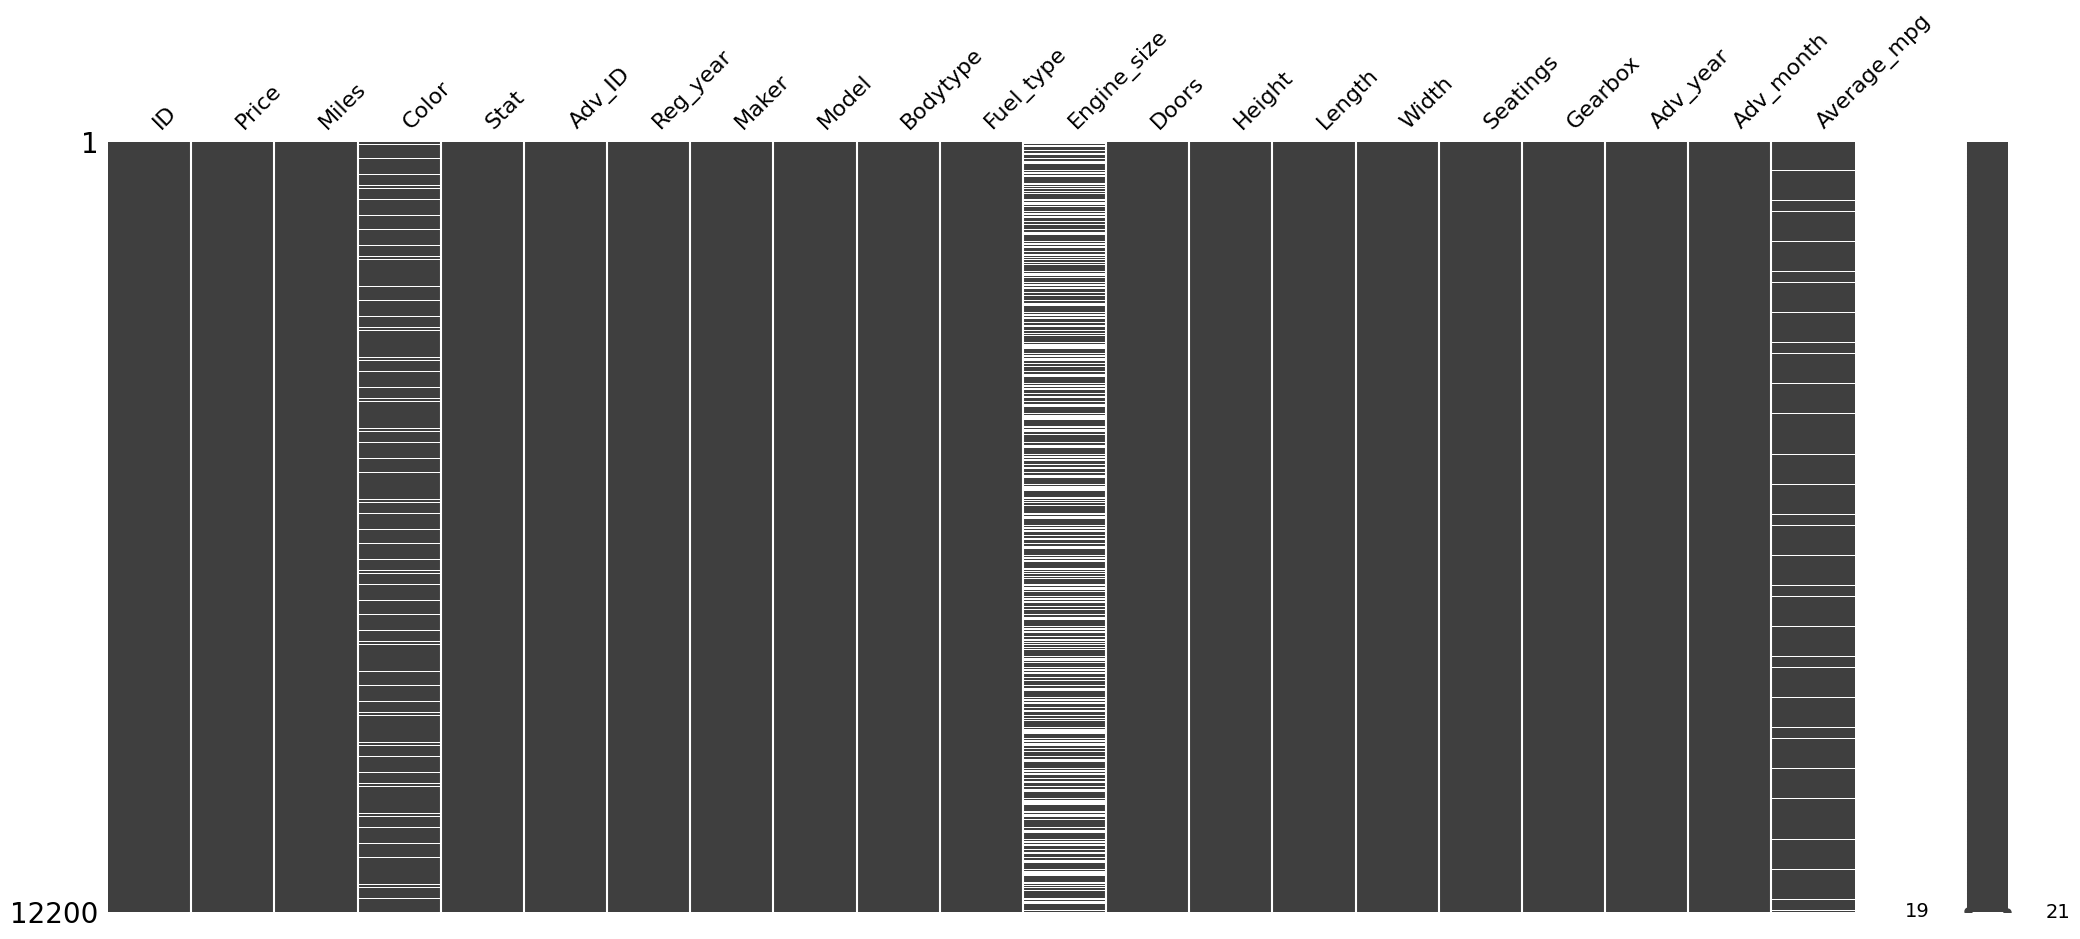

In [221]:
import missingno as msno
msno.matrix(marketcheck_df)

<Axes: >

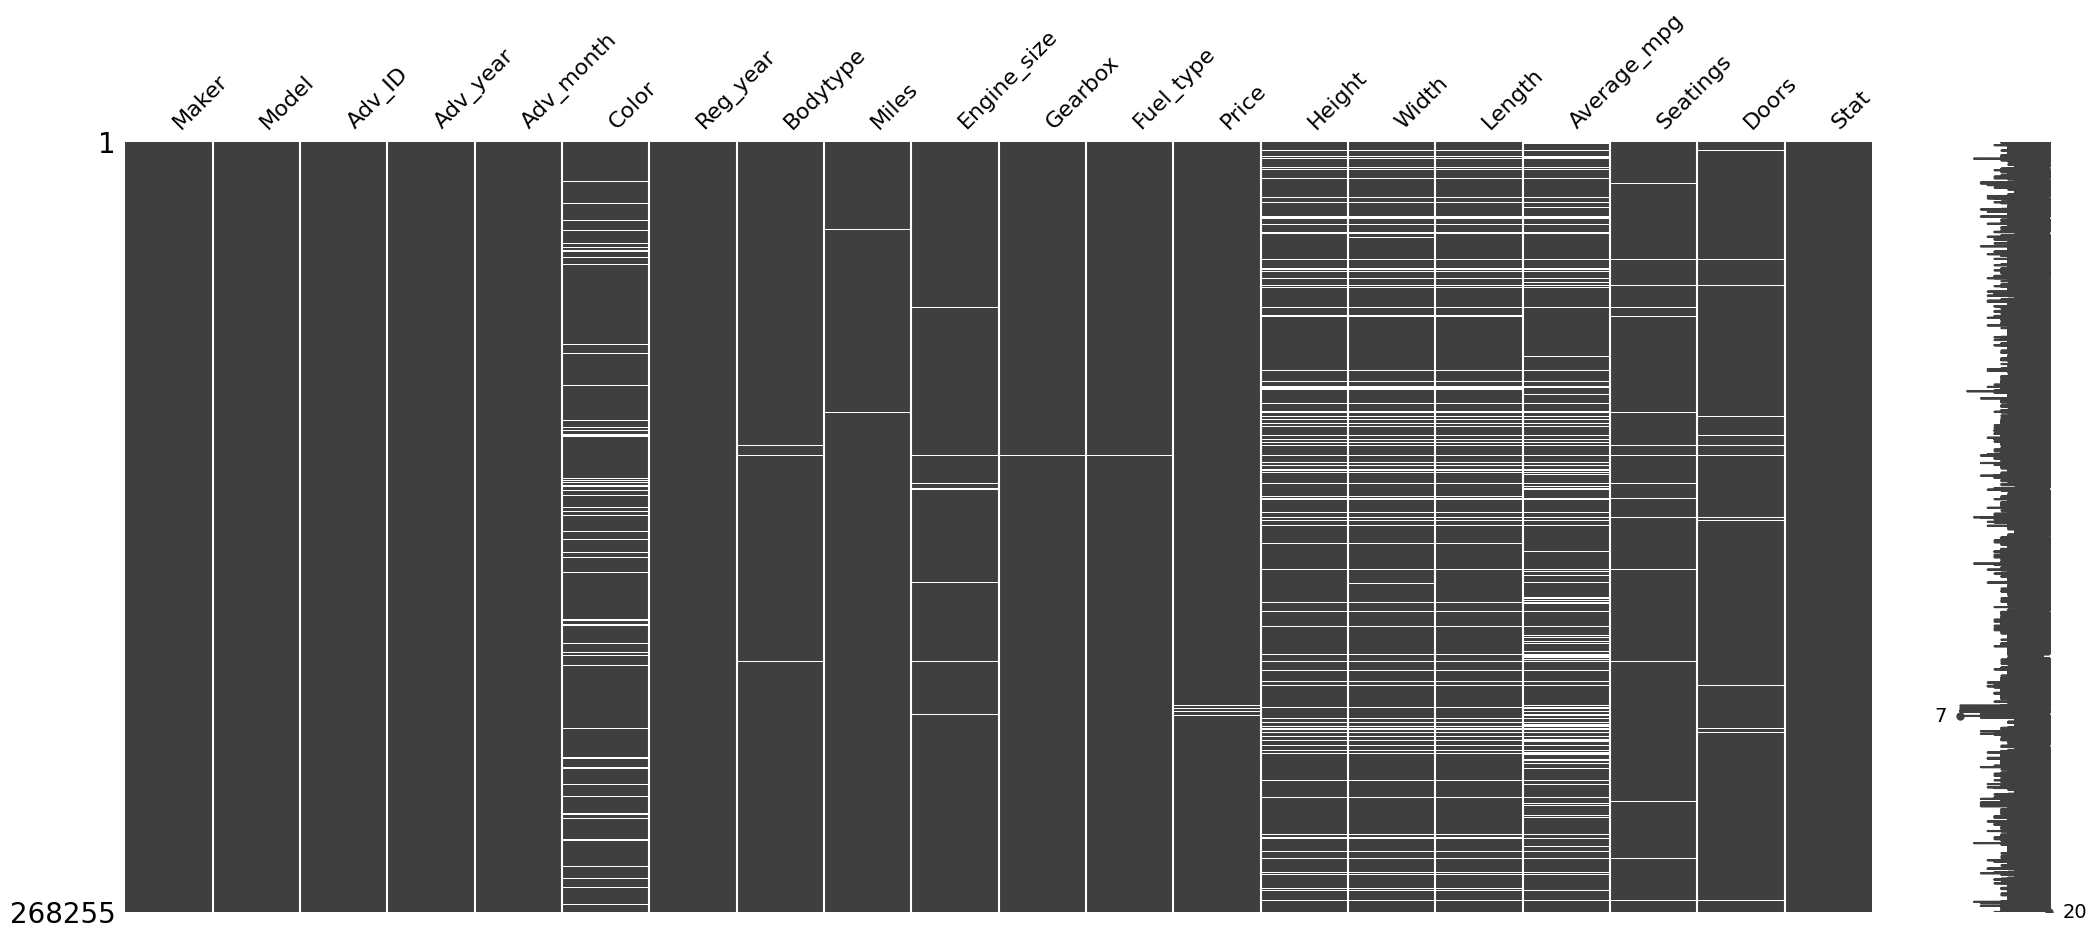

In [222]:
msno.matrix(us_cars_df)